# globalgoals-pyglobalgoals.py.ipynb

A jupyter notebook demonstrating HTML parsing, JSON-LD, RDFa, and schema.org in order to add Schema.org RDFa markup to @TheGlobalGoals for Sustainable Development at http://www.globalgoals.org/

## Background

* Homepage: **http://www.globalgoals.org/**
- Twitter: https://twitter.com/TheGlobalGoals
- Twitter: https://twitter.com/GlobalGoalsUN
- Instagram: https://instagram.com/TheGlobalGoals/
- Facebook: https://www.facebook.com/globalgoals.org
- YouTube: https://www.youtube.com/channel/UCRfuAYy7MesZmgOi1Ezy0ng/
- Hashtag: **#GlobalGoals**
  - https://twitter.com/hashtag/GlobalGoals
  - https://instagram.com/explore/tags/GlobalGoals/
  - https://www.facebook.com/hashtag/GlobalGoals
- Hashtag: #TheGlobalGoals
  - https://twitter.com/hashtag/TheGlobalGoals
  - https://instagram.com/explore/tags/TheGlobalGoals/
  - https://www.facebook.com/hashtag/TheGlobalGoals
- Hashtag: #Goal17
  - https://twitter.com/hashtag/Goal17
  - https://instagram.com/explore/tags/Goal17/
  - https://www.facebook.com/hashtag/Goal17
- Hashtag: #GlobalGoal17
  - https://twitter.com/hashtag/GlobalGoal17
  - https://instagram.com/explore/tags/GlobalGoal17/
  - https://www.facebook.com/hashtag/GlobalGoal17


### pyglobalgoals

* Homepage: https://github.com/westurner/pyglobalgoals
* Src: https://github.com/westurner/pyglobalgoals
* Download: https://github.com/westurner/pyglobalgoals/releases

### Objectives

* [x] ENH: Read and parse TheGlobalGoals from globalgoals.org
* [x] ENH: Download (HTTP GET) each GlobalGoal tile image to ``./notebooks/data/images/``
* [-] ENH: Generate e.g. tweets for each GlobalGoal (e.g. **##gg17** / **##GG17**)
* [x] ENH: Save TheGlobalGoals to a JSON-LD document
* [-] ENH: Save TheGlobalGoals with Schema.org RDF vocabulary (as JSON-LD)
* [-] ENH: Save TheGlobalGoals as ReStructuredText with headings and images
* [-] ENH: Save TheGlobalGoals as Markdown with headings and images
* [-] ENH: Save TheGlobalGoals as RDFa with headings and images
* [ ] ENH: Save TheGlobalGoals as RDFa with images like http://globalgoals.org/
* [-] DOC: Add narrative documentation where necessary
* [-] REF: Refactor and extract methods from ``./notebooks/`` to ``./pyglobalgoals/``
  
## Implementation

* Python package: [**pyglobalgoals**](#pyglobalgoals)

* Jupyter notebook: **``./notebooks/globalgoals-pyglobalgoals.py.ipynb``**
  * Src: https://github.com/westurner/pyglobalgoals/blob/master/notebooks/globalgoals-pyglobalgoals.py.ipynb
  * Src: https://github.com/westurner/pyglobalgoals/blob/master/notebooks/globalgoals-pyglobalgoals.py.py
  * Src: https://github.com/westurner/pyglobalgoals/blob/develop/notebooks/globalgoals-pyglobalgoals.py.ipynb
  * Src: https://github.com/westurner/pyglobalgoals/blob/v0.1.2/notebooks/globalgoals-pyglobalgoals.py.ipynb
  * Src: https://github.com/westurner/pyglobalgoals/blob/v0.2.1/notebooks/globalgoals-pyglobalgoals.py.ipynb

  * [x] Download HTML with requests
  * [x] Parse HTML with beautifulsoup
  * [x] Generate JSON[-LD] with ``collections.OrderedDict``
  * [-] REF: Functional methods -> more formal type model -> ``pyglobalgoals.<...>``


* [JSON-LD](#JSONLD) document: **``./notebooks/data/globalgoals.jsonld``**
  * Src: https://github.com/westurner/pyglobalgoals/blob/master/notebooks/data/globalgoals.jsonld


### JSON-LD

* Wikipedia: https://en.wikipedia.org/wiki/JSON-LD
* Homepage: http://json-ld.org/
* Docs: http://json-ld.org/playground/
* Hashtag: #JSONLD

### RDFa

* Wikipedia: https://en.wikipedia.org/wiki/RDFa
* Standard: http://www.w3.org/TR/rdfa-core/
* Docs: http://www.w3.org/TR/rdfa-primer/
* Hashtag: #RDFa

In [1]:
#!conda install -y beautiful-soup docutils jinja2 requests
!pip install -U beautifulsoup4 jinja2 'requests<2.8' requests-cache version-information # tweepy


import bs4
import jinja2
import requests
import requests_cache

requests_cache.install_cache('pyglobalgoals_cache')

#!pip install -U version_information
%load_ext version_information
%version_information jupyter, bs4, jinja2, requests, requests_cache, version_information

Requirement already up-to-date: beautifulsoup4 in /home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages
Requirement already up-to-date: jinja2 in /home/wturner/.local/lib/python2.7/site-packages
Requirement already up-to-date: requests<2.8 in /home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages
Requirement already up-to-date: requests-cache in /home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages
Requirement already up-to-date: version-information in /home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages
Requirement already up-to-date: MarkupSafe in /home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages (from jinja2)
You are using pip version 8.0.2, however version 8.1.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Software versions
Python 2.7.10 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.0.3
OS Linux 4.3.5 300.fc23.x86_64 x86_64 with fedora 23 Twenty_Three
jupyter 1.0.0
bs4 4.4.1
jinja2 2.8
requests 2.7.0
requests_cache 0.4.11
version_information 1.0.3
Tue Mar 08 17:06:27 2016 CST

In [2]:
url = "http://www.globalgoals.org/"
req = requests.get(url)

#print(req)
#print(sorted(dir(req)))
#req.<TAB>
#req??<[Ctrl-]Enter>

if not req.ok:
    raise Exception(req)
content = req.content
print(content[:20])

<!DOCTYPE html>
<htm


In [3]:
bs = bs4.BeautifulSoup(req.content)
print(bs.prettify())

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/Article" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   The Global Goals
  </title>
  <meta content="In September 2015, the United Nations are launching global goals, a series of ambitious targets to end extreme poverty and tackle climate change for everyone by 2030. Project Everyone aims to share the global goals with 7 billion people in 7 days." name="description"/>
  <link href="http://m.globalgoals.org" media="handheld" rel="alternate"/>
  <link href="http://www.globalgoals.org/wp-content/themes/global-goals-theme/style.17d422fb7212ca28bbf843fe8e1ef956.css" rel="stylesheet"/>
  <link href="http://www.globalgoals.org/wp-content/themes/global-goals-theme/global-goals-favicon.ico" rel="shortcut icon"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!--[if lt IE 9]>
	    <script src="http://www.globalgoals.org/wp-content/themes/global-goals-theme/js/vendor/html5shiv.min.js"></script>
	

/home/wturner/-wrk/-ce27/pyglobalgoals/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


In [4]:
tiles = bs.find_all(class_='goal-tile-wrapper')
pp(tiles)

[<div class="goal-tile-wrapper">\n\t\t\t\t\t\t<a class="background-color--poverty goal-tile" href="http://www.globalgoals.org/global-goals/no-poverty/">\n\t\t\t\t\t\t\t<div class="goal-tile-content">\n\t\t\t\t\t\t\t\t<img alt="No Poverty Icon" class="goal--frontpage-icon" src="http://cdn.globalgoals.org/2015/07/no-poverty1.png"/>\n\t\t\t\t\t\t\t\t<div class="overlay">\n\t\t\t\t\t\t\t\t\t<h4 class="inverted">Read More</h4>\n\t\t\t\t\t\t\t\t</div>\n\t\t\t\t\t\t\t</div>\n\t\t\t\t\t\t</a>\n\t\t\t\t\t</div>,
 <div class="goal-tile-wrapper">\n\t\t\t\t\t\t<a class="background-color--hunger goal-tile" href="http://www.globalgoals.org/global-goals/no-hunger/">\n\t\t\t\t\t\t\t<div class="goal-tile-content">\n\t\t\t\t\t\t\t\t<img alt="Zero Hunger Icon" class="goal--frontpage-icon" src="http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png"/>\n\t\t\t\t\t\t\t\t<div class="overlay">\n\t\t\t\t\t\t\t\t\t<h4 class="inverted">Read More</h4>\n\t\t\t\t\t\t\t\t</div>\n\t\t\t\t\t\t\t</div>\n\t\t\t\t\t

In [5]:
tile = tiles[0]
print(tile)
print('##')
print(tile.prettify())

<div class="goal-tile-wrapper">
						<a class="background-color--poverty goal-tile" href="http://www.globalgoals.org/global-goals/no-poverty/">
							<div class="goal-tile-content">
								<img alt="No Poverty Icon" class="goal--frontpage-icon" src="http://cdn.globalgoals.org/2015/07/no-poverty1.png"/>
								<div class="overlay">
									<h4 class="inverted">Read More</h4>
								</div>
							</div>
						</a>
					</div>
##
<div class="goal-tile-wrapper">
 <a class="background-color--poverty goal-tile" href="http://www.globalgoals.org/global-goals/no-poverty/">
  <div class="goal-tile-content">
   <img alt="No Poverty Icon" class="goal--frontpage-icon" src="http://cdn.globalgoals.org/2015/07/no-poverty1.png"/>
   <div class="overlay">
    <h4 class="inverted">
     Read More
    </h4>
   </div>
  </div>
 </a>
</div>



In [6]:
link = tile.findNext('a')
img = link.findNext('img')
img_title = img['alt'][:-5]
img_src = img['src']
link_href = link['href']
example = {'name': img_title, 'img_src': img_src, 'href': link_href}
print(example)

{'href': u'http://www.globalgoals.org/global-goals/no-poverty/', 'name': u'No Poverty', 'img_src': u'http://cdn.globalgoals.org/2015/07/no-poverty1.png'}


In [7]:
import collections
def get_data_from_goal_tile_wrapper_div(node, n=None):
    link = node.findNext('a')
    img = link.findNext('img')
    img_title = img['alt'][:-5]
    img_src = img['src']
    link_href = link['href']
    output = collections.OrderedDict({'@type': 'un:GlobalGoal'})
    if n:
        output['n'] = n
    output['name'] = img_title
    output['image'] = img_src
    output['url'] = link_href
    return output

def get_goal_tile_data(bs):
    for i, tile in enumerate(bs.find_all(class_='goal-tile-wrapper')[:-1], 1):
        try:
            yield get_data_from_goal_tile_wrapper_div(tile, n=i)
        except KeyError as e:
            print((i, tile))
            raise
        
tiles = list(get_goal_tile_data(bs))
import json
print(json.dumps(tiles, indent=2))
goal_tiles = tiles

[
  {
    "@type": "un:GlobalGoal", 
    "n": 1, 
    "name": "No Poverty", 
    "image": "http://cdn.globalgoals.org/2015/07/no-poverty1.png", 
    "url": "http://www.globalgoals.org/global-goals/no-poverty/"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 2, 
    "name": "Zero Hunger", 
    "image": "http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png", 
    "url": "http://www.globalgoals.org/global-goals/no-hunger/"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 3, 
    "name": "Good Health & Well-Being", 
    "image": "http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png", 
    "url": "http://www.globalgoals.org/global-goals/good-health/"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 4, 
    "name": "Quality Education", 
    "image": "http://cdn.globalgoals.org/2015/07/education.png", 
    "url": "http://www.globalgoals.org/global-goals/quality-education/"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 5, 
    "name": "Gender Equality", 
    "image": "h

In [8]:

import codecs
from path import Path

def build_default_context():
    context = collections.OrderedDict()
    # context["dc"] = "http://purl.org/dc/elements/1.1/"
    context["schema"] = "http://schema.org/"
    # context["xsd"] = "http://www.w3.org/2001/XMLSchema#"
    # context["ex"] = "http://example.org/vocab#"
    # context["ex:contains"] = {
    #    "@type": "@id"
    # }
    
    # default attrs (alternative: prefix each with schema:)
    #  schema.org/Thing == schema:Thing (!= schema:thing)
    context["name"] = "http://schema.org/name"
    context["image"] = {
        "@type": "@id",
        "@id": "http://schema.org/image"
    }
    context["url"] = {
        "@type": "@id",
        "@id":"http://schema.org/url"
    }
    context["description"] = {
        "@type": "http://schema.org/Text",
        "@id": "http://schema.org/description"
    }
    return context

DEFAULT_CONTEXT = build_default_context()

def goal_tiles_to_jsonld(nodes, context=None, default_context=DEFAULT_CONTEXT):
    data = collections.OrderedDict()
    if context is None and default_context is not None:
        data['@context'] = build_default_context()
    elif context:
        data['@context'] = context
    elif default_context:
        data['@context'] = default_context
    data['@graph'] = nodes
    
    return data



DATA_DIR = Path('.') / 'data'
#DATA_DIR = Path(__file__).dirname
#DATA_DIR = determine_path_to(current_notebook) # PWD initially defaults to nb.CWD
DATA_DIR.makedirs_p()
GLOBAL_GOALS_JSONLD_PATH = DATA_DIR / 'globalgoals.jsonld'

def write_global_goals_jsonld(goal_tiles, path=GLOBAL_GOALS_JSONLD_PATH):
    goal_tiles_jsonld = goal_tiles_to_jsonld(goal_tiles)
    with codecs.open(path, 'w', 'utf8') as fileobj:
        json.dump(goal_tiles_jsonld, fileobj, indent=2)

def read_global_goals_jsonld(path=GLOBAL_GOALS_JSONLD_PATH, prettyprint=True):
    with codecs.open(path, 'r', 'utf8') as fileobj:
        global_goals_dict = json.load(fileobj,
                                     object_pairs_hook=collections.OrderedDict)
    return global_goals_dict

def print_json_dumps(global_goals_dict, indent=2):
    print(json.dumps(global_goals_dict, indent=indent))

    
write_global_goals_jsonld(goal_tiles)

global_goals_dict = read_global_goals_jsonld(path=GLOBAL_GOALS_JSONLD_PATH)

assert global_goals_dict == goal_tiles_to_jsonld(goal_tiles)

print_json_dumps(global_goals_dict)

{
  "@context": {
    "schema": "http://schema.org/", 
    "name": "http://schema.org/name", 
    "image": {
      "@id": "http://schema.org/image", 
      "@type": "@id"
    }, 
    "url": {
      "@id": "http://schema.org/url", 
      "@type": "@id"
    }, 
    "description": {
      "@id": "http://schema.org/description", 
      "@type": "http://schema.org/Text"
    }
  }, 
  "@graph": [
    {
      "@type": "un:GlobalGoal", 
      "n": 1, 
      "name": "No Poverty", 
      "image": "http://cdn.globalgoals.org/2015/07/no-poverty1.png", 
      "url": "http://www.globalgoals.org/global-goals/no-poverty/"
    }, 
    {
      "@type": "un:GlobalGoal", 
      "n": 2, 
      "name": "Zero Hunger", 
      "image": "http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png", 
      "url": "http://www.globalgoals.org/global-goals/no-hunger/"
    }, 
    {
      "@type": "un:GlobalGoal", 
      "n": 3, 
      "name": "Good Health & Well-Being", 
      "image": "http://cdn.globalgoals.org/2

In [9]:
def build_tweet_for_goal_tile(node):
     return '##gg{n} {name} {url} {image} @TheGlobalGoals #GlobalGoals'.format(**node)
        
tweets = list(build_tweet_for_goal_tile(tile) for tile in goal_tiles)
tweets

['##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals',
 '##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png @TheGlobalGoals #GlobalGoals',
 '##gg3 Good Health & Well-Being http://www.globalgoals.org/global-goals/good-health/ http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png @TheGlobalGoals #GlobalGoals',
 '##gg4 Quality Education http://www.globalgoals.org/global-goals/quality-education/ http://cdn.globalgoals.org/2015/07/education.png @TheGlobalGoals #GlobalGoals',
 '##gg5 Gender Equality http://www.globalgoals.org/global-goals/gender-equality/ http://cdn.globalgoals.org/2015/07/gender1.png @TheGlobalGoals #GlobalGoals',
 '##gg6 Clean Water & Sanitation http://www.globalgoals.org/global-goals/clean-water-sanitation/ http://cdn.globalgoals.org/2015/07/clean-water.png @TheGlobalGoals #GlobalGoals',
 '#

In [10]:

for node in goal_tiles:
    img_basename = node['image'].split('/')[-1]
    node['image_basename'] = img_basename
    node['tweet_txt'] = build_tweet_for_goal_tile(node)
    
print(json.dumps(goal_tiles, indent=2))

[
  {
    "@type": "un:GlobalGoal", 
    "n": 1, 
    "name": "No Poverty", 
    "image": "http://cdn.globalgoals.org/2015/07/no-poverty1.png", 
    "url": "http://www.globalgoals.org/global-goals/no-poverty/", 
    "image_basename": "no-poverty1.png", 
    "tweet_txt": "##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 2, 
    "name": "Zero Hunger", 
    "image": "http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png", 
    "url": "http://www.globalgoals.org/global-goals/no-hunger/", 
    "image_basename": "gg-2nohunger-english.png", 
    "tweet_txt": "##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png @TheGlobalGoals #GlobalGoals"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 3, 
    "name": "Good Health & Well-Being", 
    "image": "http://cdn.globa

In [11]:
#!conda install -y pycurl
try:
    import pycurl
except ImportError as e:
    import warnings
    warnings.warn(unicode(e))
def pycurl_download_file(url, dest_path, follow_redirects=True):
    with open(dest_path, 'wb') as f:
        c = pycurl.Curl()
        c.setopt(c.URL, url)
        c.setopt(c.WRITEDATA, f)
        if follow_redirects:
            c.setopt(c.FOLLOWLOCATION, True)
        c.perform()
        c.close()
    return (url, dest_path)

In [12]:
import requests
def requests_download_file(url, dest_path, **kwargs):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(dest_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()
    return (url, dest_path)

In [13]:
import urllib
def urllib_urlretrieve_download_file(url, dest_path):
    """
    * https://docs.python.org/2/library/urllib.html#urllib.urlretrieve
    """
    (filename, headers) = urlllib.urlretrieve(url, dest_path)
    return (url, filename)

In [14]:

def deduplicate_on_attr(nodes, attr='image_basename'):
    attrindex = collections.OrderedDict()
    for node in nodes:
        attrindex.setdefault(node[attr], [])
        attrindex[node[attr]].append(node)
    return attrindex
        
def check_for_key_collisions(dict_of_lists):
    for name, _nodes in dict_of_lists.items():
        if len(_nodes) > 1:
            raise Exception(('duplicate filenames:')
                (name, nodes))
    
attrindex = deduplicate_on_attr(goal_tiles, attr='image_basename')
check_for_key_collisions(attrindex)
#

IMG_DIR = DATA_DIR / 'images'
IMG_DIR.makedirs_p()

def download_goal_tile_images(nodes, img_path):
    for node in nodes:
        dest_path = img_path / node['image_basename']
        source_url = node['image']
        (url, dest) = requests_download_file(source_url, dest_path)
        node['image_path'] = dest
        print((node['n'], node['name']))
        print((node['image_path']))
        # time.sleep(1)  # see: requests_cache
    
download_goal_tile_images(goal_tiles, IMG_DIR)

tiles_jsonld = goal_tiles_to_jsonld(goal_tiles)
print(json.dumps(tiles_jsonld, indent=2))

(1, u'No Poverty')
./data/images/no-poverty1.png
(2, u'Zero Hunger')
./data/images/gg-2nohunger-english.png
(3, u'Good Health & Well-Being')
./data/images/gg-3goodhealth-english.png
(4, u'Quality Education')
./data/images/education.png
(5, u'Gender Equality')
./data/images/gender1.png
(6, u'Clean Water & Sanitation')
./data/images/clean-water.png
(7, u'Affordable & Clean Energy')
./data/images/gg-7renewableenergy-english.png
(8, u'Decent Work & Economic Growth')
./data/images/gg-8goodjobseconomicgrowth-english.png
(9, u'Industry, Innovation & Infrastructure')
./data/images/gg-9innovationandinfrastructure-english.png
(10, u'Reduced Inequalities')
./data/images/reduced-inequality.png
(11, u'Sustainable Cities and Communities')
./data/images/cities.png
(12, u'Responsible Consumption & Production')
./data/images/gg-12responsibleconsumption-english.png
(13, u'Climate Action')
./data/images/climate.png
(14, u'Life Below Water')
./data/images/water-life.png
(15, u'Life on Land')
./data/images

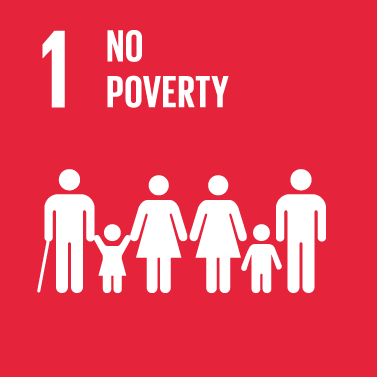

In [15]:
#import jupyter.display as display
import IPython.display as display
display.Image(goal_tiles[0]['image_path'])

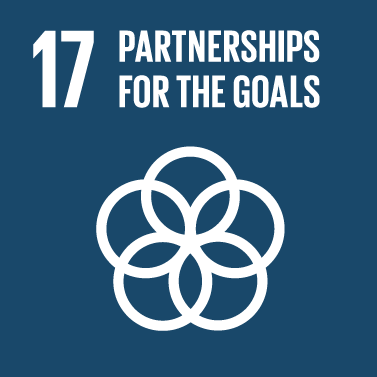

In [16]:
import IPython.display
for tile in goal_tiles:
    x = IPython.display.Image(tile['image_path'])
x

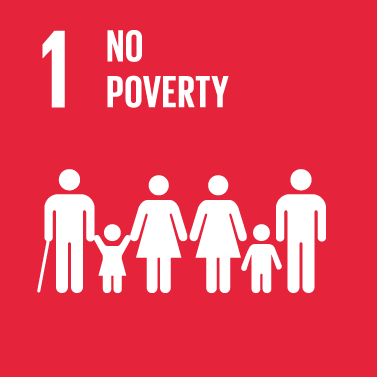

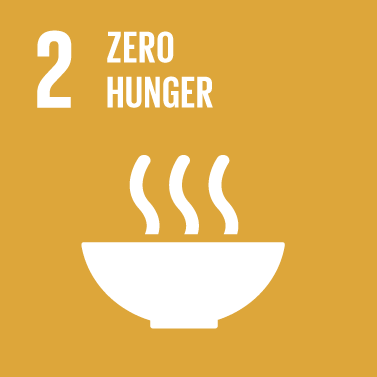

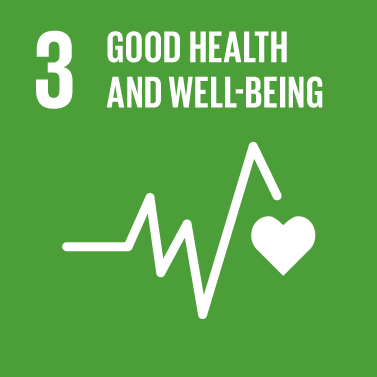

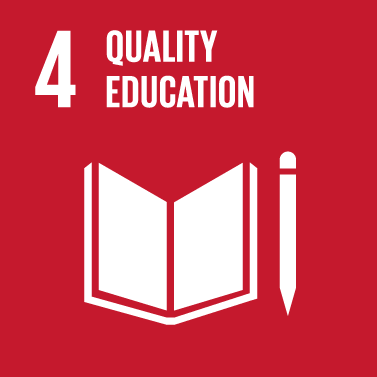

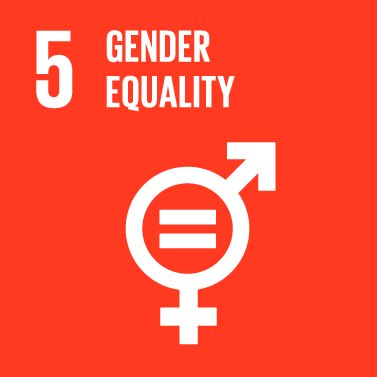

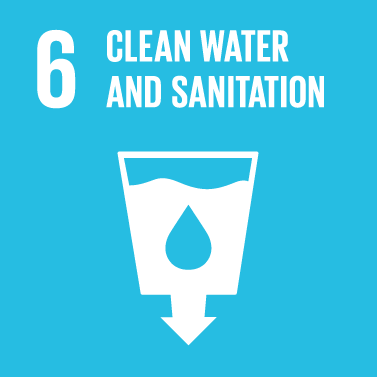

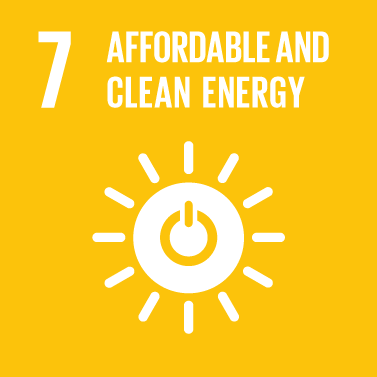

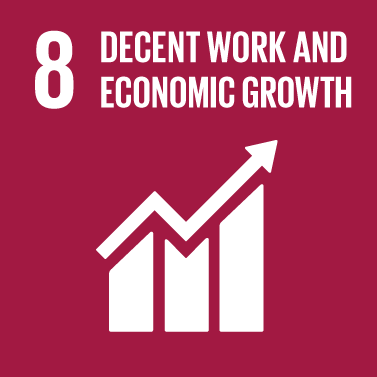

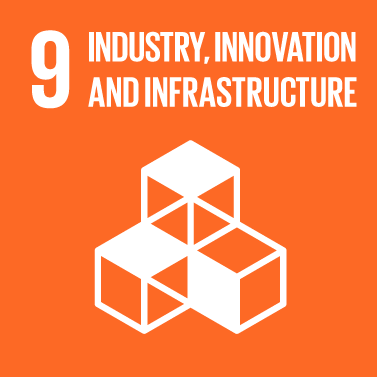

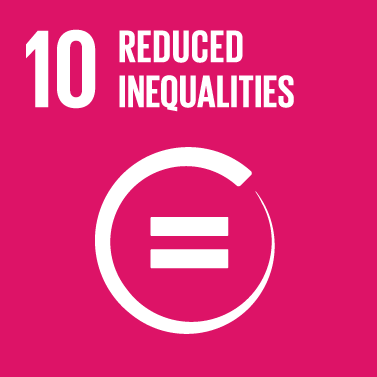

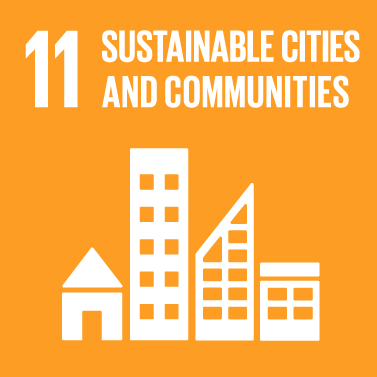

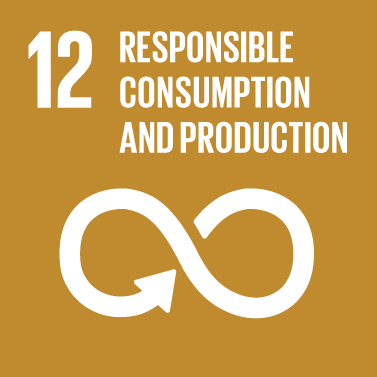

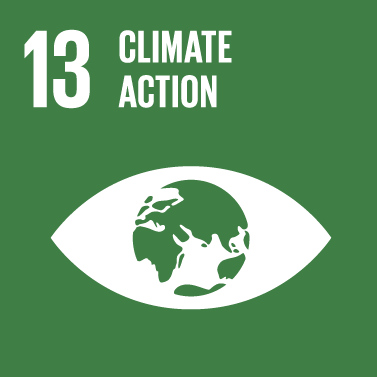

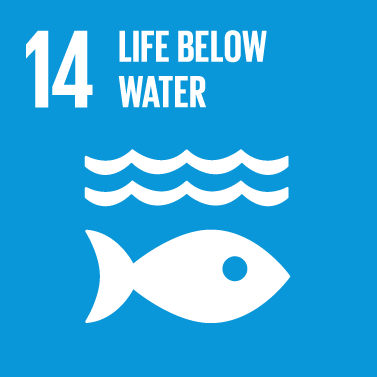

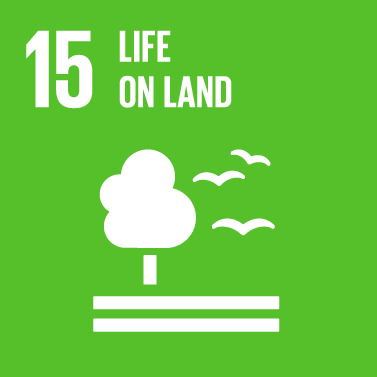

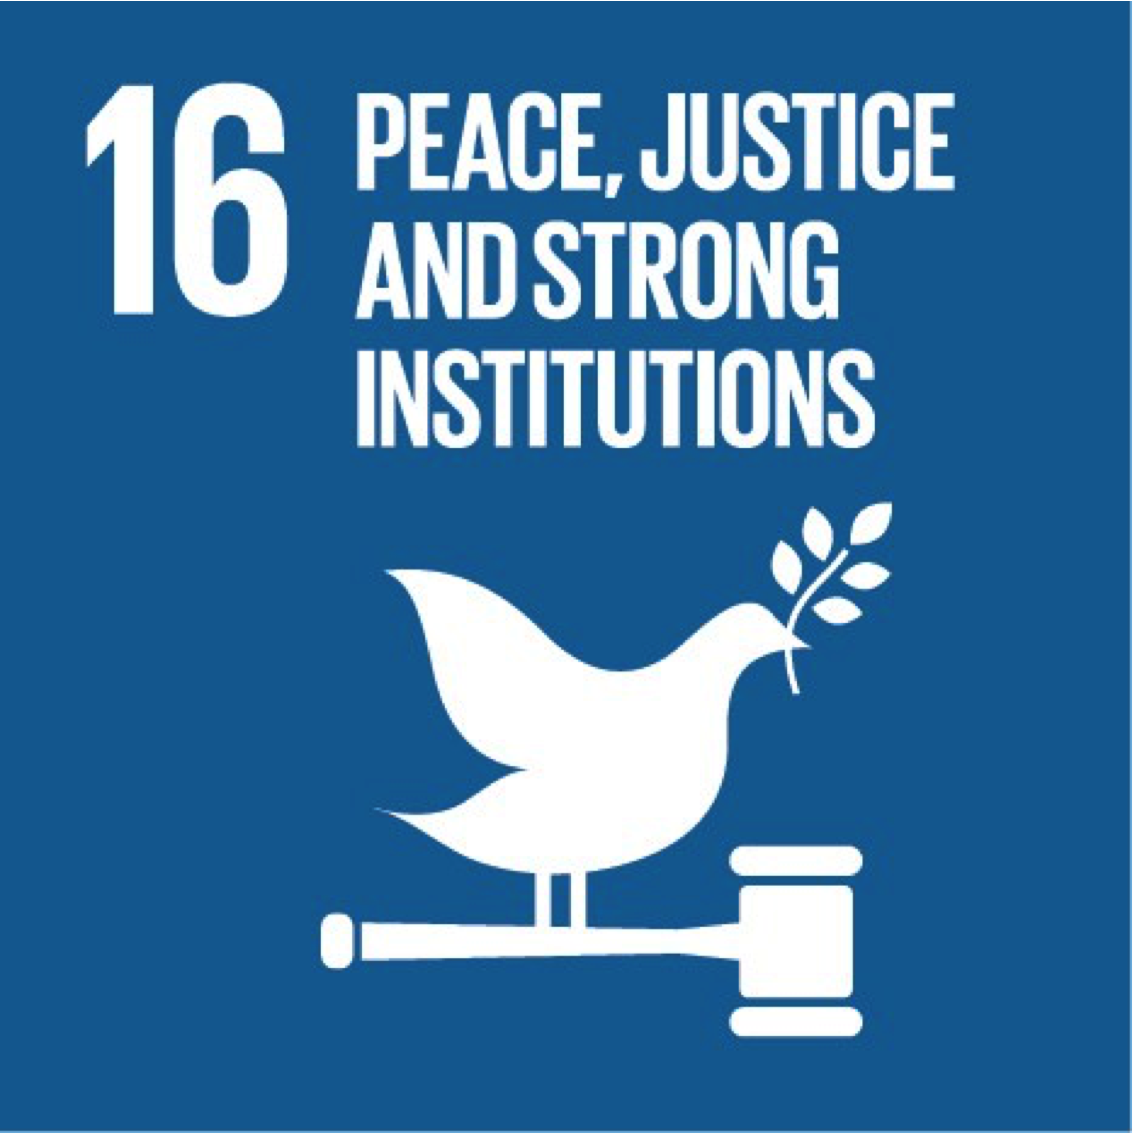

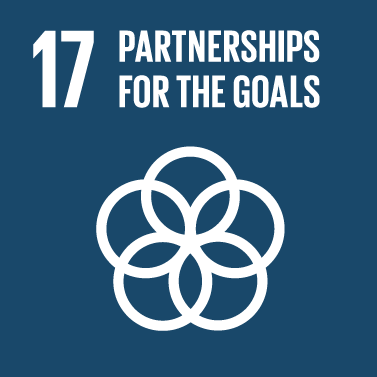

In [17]:
import IPython.display
def display_goal_images():
    for tile in goal_tiles:
        yield IPython.display.Image(tile['image_path'])
x = list(display_goal_images())
#pp(x)
IPython.display.display(*x)

In [18]:

import string
print(string.punctuation)

NOT_URI_CHARS = dict.fromkeys(string.punctuation + string.digits)
NOT_URI_CHARS.pop('-')
NOT_URI_CHARS.pop('_')
def _slugify(txt):
    """an ~approximate slugify function for human-readable URI #fragments"""
    txt = txt.strip().lower()
    chars = (
        (c if c != ' ' else '-') for c in txt if
             c not in NOT_URI_CHARS)
    return u''.join(chars)

def _slugify_single_dash(txt):
    """
    * unlike docutils, this function does not strip stopwords like 'and' and 'or'
    TODO: locate this method in docutils
    """
    def _one_dash_only(txt):
        count = 0
        for char in txt:
            if char == '-':
                count += 1
            else:
                if count:
                    yield '-'
                yield char
                count = 0
    return u''.join(_one_dash_only(_slugify(txt)))
    
            

for node in goal_tiles:
    node['name_numbered'] = "%d. %s" % (node['n'], node['name'])
    node['slug_rst'] = _slugify_single_dash(node['name'])
    node['slug_md'] = _slugify_single_dash(node['name'])
    
print_json_dumps(goal_tiles)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[
  {
    "@type": "un:GlobalGoal", 
    "n": 1, 
    "name": "No Poverty", 
    "image": "http://cdn.globalgoals.org/2015/07/no-poverty1.png", 
    "url": "http://www.globalgoals.org/global-goals/no-poverty/", 
    "image_basename": "no-poverty1.png", 
    "tweet_txt": "##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals", 
    "image_path": "./data/images/no-poverty1.png", 
    "name_numbered": "1. No Poverty", 
    "slug_rst": "no-poverty", 
    "slug_md": "no-poverty"
  }, 
  {
    "@type": "un:GlobalGoal", 
    "n": 2, 
    "name": "Zero Hunger", 
    "image": "http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png", 
    "url": "http://www.globalgoals.org/global-goals/no-hunger/", 
    "image_basename": "gg-2nohunger-english.png", 
    "tweet_txt": "##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/201

## 1. No Poverty

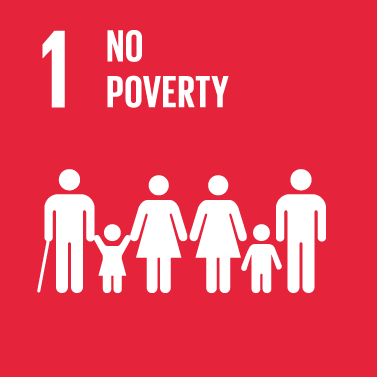

\##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals

## 2. Zero Hunger

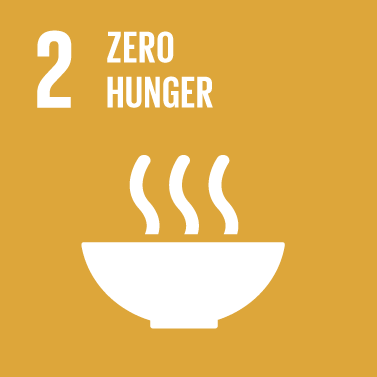

\##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png @TheGlobalGoals #GlobalGoals

## 3. Good Health & Well-Being

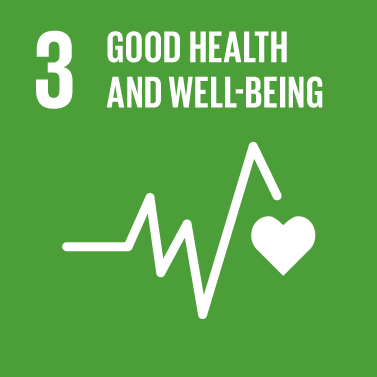

\##gg3 Good Health & Well-Being http://www.globalgoals.org/global-goals/good-health/ http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png @TheGlobalGoals #GlobalGoals

## 4. Quality Education

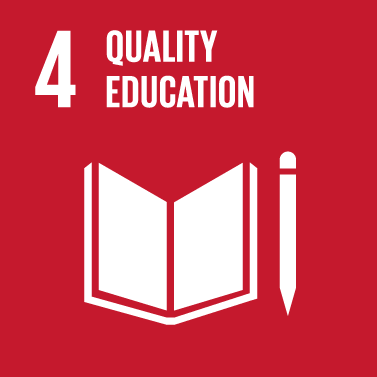

\##gg4 Quality Education http://www.globalgoals.org/global-goals/quality-education/ http://cdn.globalgoals.org/2015/07/education.png @TheGlobalGoals #GlobalGoals

## 5. Gender Equality

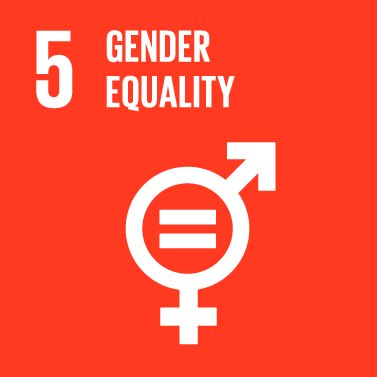

\##gg5 Gender Equality http://www.globalgoals.org/global-goals/gender-equality/ http://cdn.globalgoals.org/2015/07/gender1.png @TheGlobalGoals #GlobalGoals

## 6. Clean Water & Sanitation

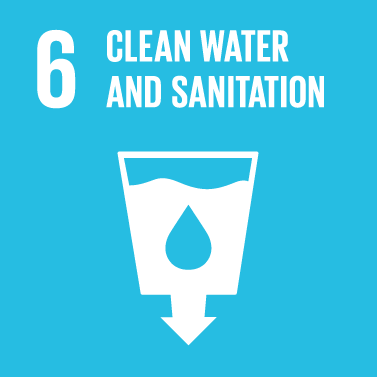

\##gg6 Clean Water & Sanitation http://www.globalgoals.org/global-goals/clean-water-sanitation/ http://cdn.globalgoals.org/2015/07/clean-water.png @TheGlobalGoals #GlobalGoals

## 7. Affordable & Clean Energy

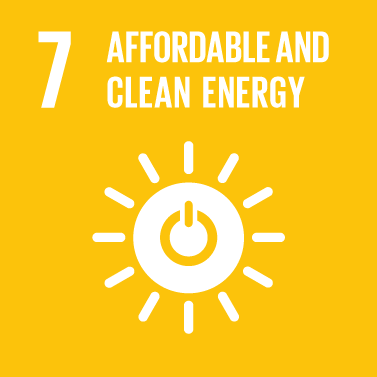

\##gg7 Affordable & Clean Energy http://www.globalgoals.org/global-goals/modern-energy/ http://cdn.globalgoals.org/2015/07/gg-7renewableenergy-english.png @TheGlobalGoals #GlobalGoals

## 8. Decent Work & Economic Growth

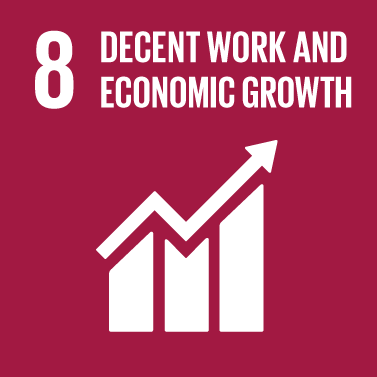

\##gg8 Decent Work & Economic Growth http://www.globalgoals.org/global-goals/good-jobs-and-economic/ http://cdn.globalgoals.org/2015/07/gg-8goodjobseconomicgrowth-english.png @TheGlobalGoals #GlobalGoals

## 9. Industry, Innovation & Infrastructure

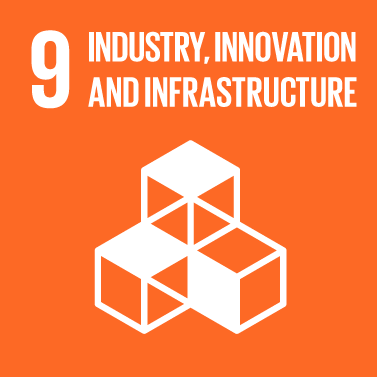

\##gg9 Industry, Innovation & Infrastructure http://www.globalgoals.org/global-goals/innovation-and-infrastructure/ http://cdn.globalgoals.org/2015/07/gg-9innovationandinfrastructure-english.png @TheGlobalGoals #GlobalGoals

## 10. Reduced Inequalities

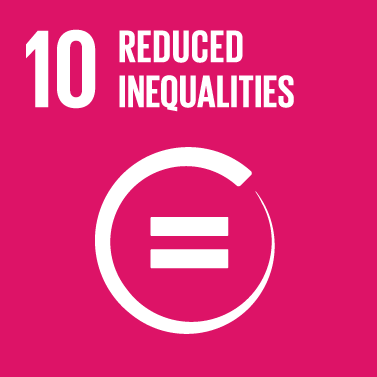

\##gg10 Reduced Inequalities http://www.globalgoals.org/global-goals/reduced-inequalities/ http://cdn.globalgoals.org/2015/07/reduced-inequality.png @TheGlobalGoals #GlobalGoals

## 11. Sustainable Cities and Communities

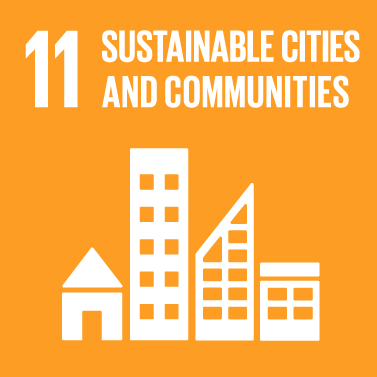

\##gg11 Sustainable Cities and Communities http://www.globalgoals.org/global-goals/sustainable-cities-and-communities/ http://cdn.globalgoals.org/2015/07/cities.png @TheGlobalGoals #GlobalGoals

## 12. Responsible Consumption & Production

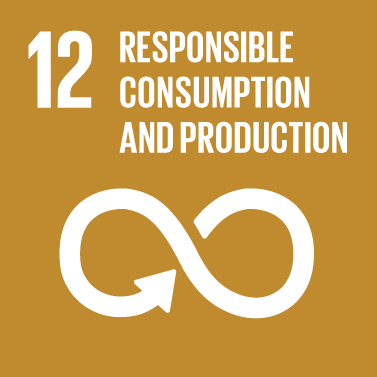

\##gg12 Responsible Consumption & Production http://www.globalgoals.org/global-goals/responsible-consumption/ http://cdn.globalgoals.org/2015/07/gg-12responsibleconsumption-english.png @TheGlobalGoals #GlobalGoals

## 13. Climate Action

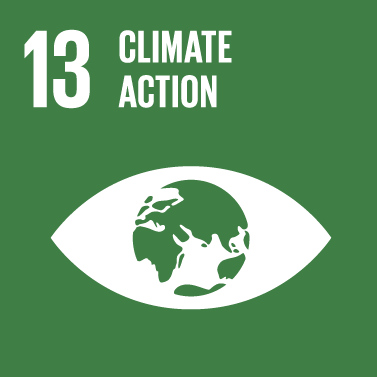

\##gg13 Climate Action http://www.globalgoals.org/global-goals/protect-the-planet/ http://cdn.globalgoals.org/2015/07/climate.png @TheGlobalGoals #GlobalGoals

## 14. Life Below Water

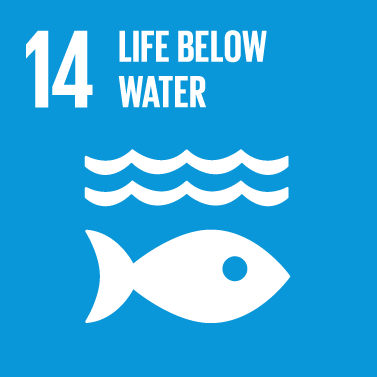

\##gg14 Life Below Water http://www.globalgoals.org/global-goals/life-below-water/ http://cdn.globalgoals.org/2015/07/water-life.png @TheGlobalGoals #GlobalGoals

## 15. Life on Land

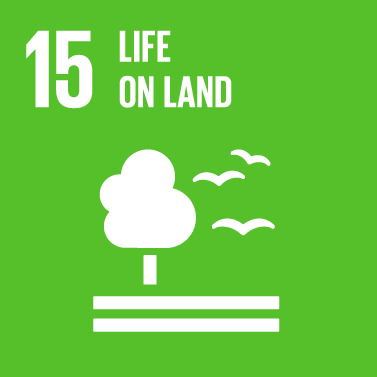

\##gg15 Life on Land http://www.globalgoals.org/global-goals/life-on-land/ http://cdn.globalgoals.org/2015/07/land-life.png @TheGlobalGoals #GlobalGoals

## 16. Peace, Justice and Strong Institutions

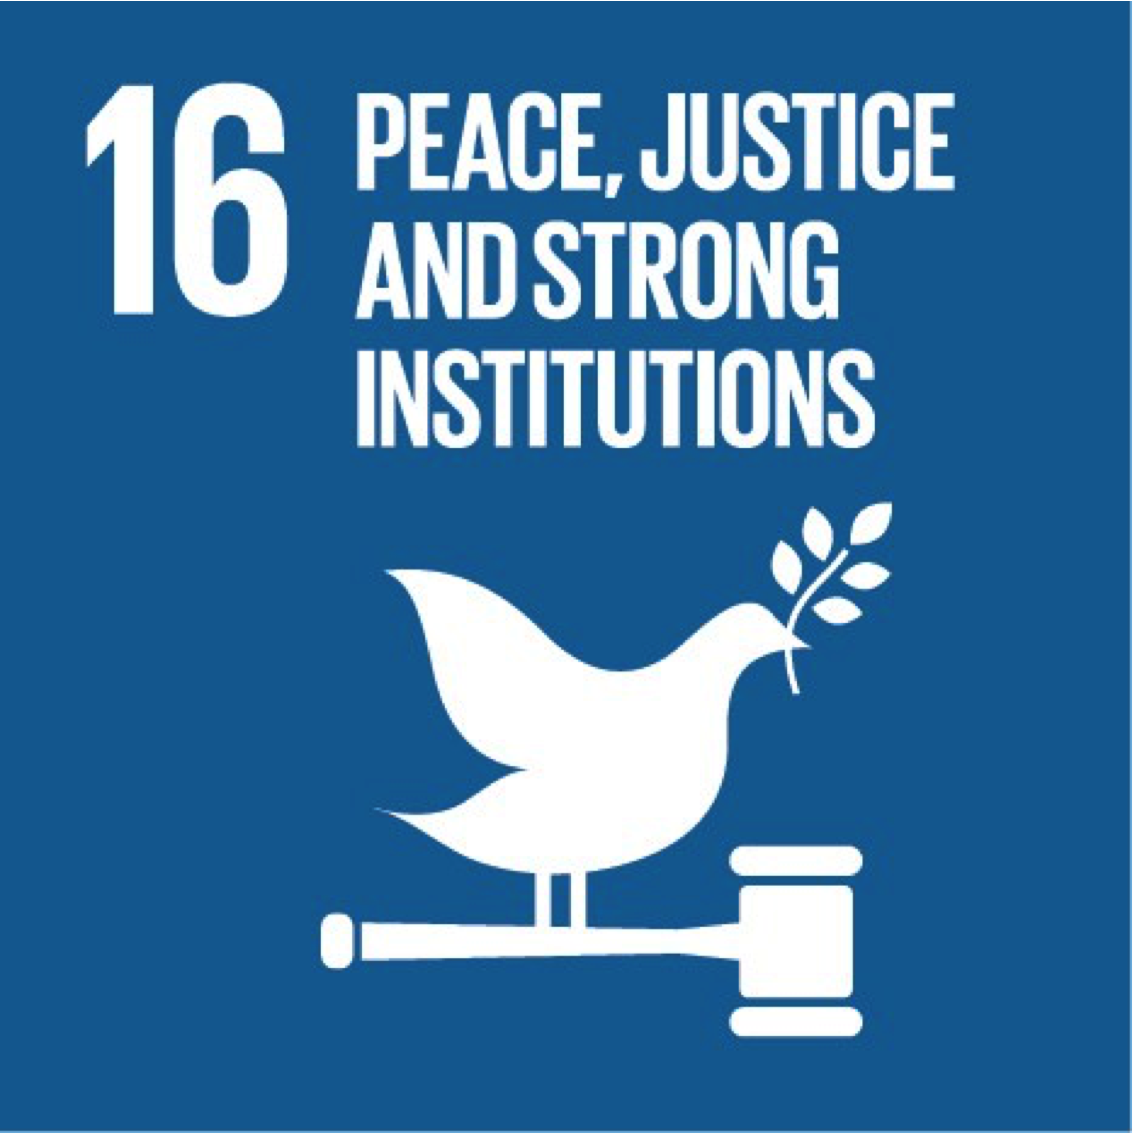

\##gg16 Peace, Justice and Strong Institutions http://www.globalgoals.org/global-goals/peace-and-justice/ http://cdn.globalgoals.org/2015/07/goal-16.png @TheGlobalGoals #GlobalGoals

## 17. Partnerships for the Goals

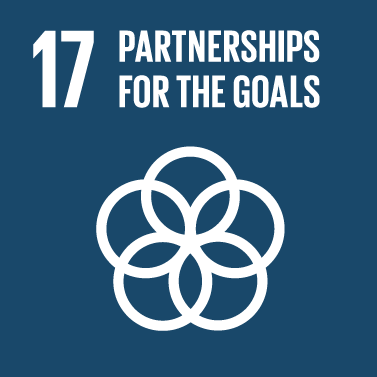

\##gg17 Partnerships for the Goals http://www.globalgoals.org/global-goals/partnerships-for-the-goals/ http://cdn.globalgoals.org/2015/07/partnership.png @TheGlobalGoals #GlobalGoals

In [19]:
import IPython.display
def display_goal_images():
    for tile in goal_tiles:
        yield IPython.display.Markdown("## %s" % tile['name_numbered'])
        yield IPython.display.Image(tile['image_path'])
        yield IPython.display.Markdown(tile['tweet_txt'].replace('##', '\##'))
x = list(display_goal_images())
#pp(x)
IPython.display.display(*x)

In [20]:
TMPL_RST = """

The Global Goals
******************

.. contents::

{% for node in nodes %}
{{ node['name_numbered'] }}
======================================================
| {{ node['url'] }}

.. image:: {{ node['image'] }}{# node['image_path'] #}
   :target: {{ node['url'] }}
   :alt: {{ node['name'] }} 

..

   {{ node['tweet_txt'] }}
   
{% endfor %}
"""
tmpl_rst = jinja2.Template(TMPL_RST)
output_rst = tmpl_rst.render(nodes=goal_tiles)
print(output_rst)





The Global Goals
******************

.. contents::


1. No Poverty
| http://www.globalgoals.org/global-goals/no-poverty/

.. image:: http://cdn.globalgoals.org/2015/07/no-poverty1.png
   :target: http://www.globalgoals.org/global-goals/no-poverty/
   :alt: No Poverty 

..

   ##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals
   

2. Zero Hunger
| http://www.globalgoals.org/global-goals/no-hunger/

.. image:: http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png
   :target: http://www.globalgoals.org/global-goals/no-hunger/
   :alt: Zero Hunger 

..

   ##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png @TheGlobalGoals #GlobalGoals
   

3. Good Health & Well-Being
| http://www.globalgoals.org/global-goals/good-health/

.. image:: http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png
   :target: ht

In [21]:
output_rst_path = DATA_DIR / 'globalgoals.rst'
with codecs.open(output_rst_path, 'w', encoding='utf-8') as f:
    f.write(output_rst)
    print("# wrote goals to %r" % output_rst_path)


# wrote goals to Path(u'./data/globalgoals.rst')


In [22]:
import docutils.core
output_rst_html = docutils.core.publish_string(output_rst, writer_name='html')
print(bs4.BeautifulSoup(output_rst_html).find(id='the-global-goals'))

<div class="document" id="the-global-goals">
<h1 class="title">The Global Goals</h1>

<div class="contents topic" id="contents">
<p class="topic-title first">Contents</p>
<ul class="simple">
<li><a class="reference internal" href="#no-poverty" id="id1">1. No Poverty</a></li>
<li><a class="reference internal" href="#zero-hunger" id="id2">2. Zero Hunger</a></li>
<li><a class="reference internal" href="#good-health-well-being" id="id3">3. Good Health &amp; Well-Being</a></li>
<li><a class="reference internal" href="#quality-education" id="id4">4. Quality Education</a></li>
<li><a class="reference internal" href="#gender-equality" id="id5">5. Gender Equality</a></li>
<li><a class="reference internal" href="#clean-water-sanitation" id="id6">6. Clean Water &amp; Sanitation</a></li>
<li><a class="reference internal" href="#affordable-clean-energy" id="id7">7. Affordable &amp; Clean Energy</a></li>
<li><a class="reference internal" href="#decent-work-economic-growth" id="id8">8. Decent Work &a

In [23]:
IPython.display.HTML(output_rst_html)

In [24]:

TMPL_MD = """

# The Global Goals

**Contents:**
{% for node in nodes %}
* [{{ node['name_numbered'] }}](#{{ node['slug_md'] }})
{%- endfor %}

{% for node in nodes %}
## {{ node['name_numbered'] }}
{{ node['url'] }}

[![{{node['name_numbered']}}]({{ node['image'] }})]({{ node['url'] }})

> {{ node['tweet_txt'] }}

{% endfor %}
"""
tmpl_md = jinja2.Template(TMPL_MD)
output_markdown = tmpl_md.render(nodes=goal_tiles)
print(output_markdown)




# The Global Goals

**Contents:**

* [1. No Poverty](#no-poverty)
* [2. Zero Hunger](#zero-hunger)
* [3. Good Health & Well-Being](#good-health-well-being)
* [4. Quality Education](#quality-education)
* [5. Gender Equality](#gender-equality)
* [6. Clean Water & Sanitation](#clean-water-sanitation)
* [7. Affordable & Clean Energy](#affordable-clean-energy)
* [8. Decent Work & Economic Growth](#decent-work-economic-growth)
* [9. Industry, Innovation & Infrastructure](#industry-innovation-infrastructure)
* [10. Reduced Inequalities](#reduced-inequalities)
* [11. Sustainable Cities and Communities](#sustainable-cities-and-communities)
* [12. Responsible Consumption & Production](#responsible-consumption-production)
* [13. Climate Action](#climate-action)
* [14. Life Below Water](#life-below-water)
* [15. Life on Land](#life-on-land)
* [16. Peace, Justice and Strong Institutions](#peace-justice-and-strong-institutions)
* [17. Partnerships for the Goals](#partnerships-for-the-goals)


## 1

In [25]:
output_md_path = DATA_DIR / 'globalgoals.md'
with codecs.open(output_md_path, 'w', encoding='utf-8') as f:
    f.write(output_markdown)
    print("# wrote goals to %r" % output_md_path)


# wrote goals to Path(u'./data/globalgoals.md')


In [26]:
IPython.display.Markdown(output_markdown)




# The Global Goals

**Contents:**

* [1. No Poverty](#no-poverty)
* [2. Zero Hunger](#zero-hunger)
* [3. Good Health & Well-Being](#good-health-well-being)
* [4. Quality Education](#quality-education)
* [5. Gender Equality](#gender-equality)
* [6. Clean Water & Sanitation](#clean-water-sanitation)
* [7. Affordable & Clean Energy](#affordable-clean-energy)
* [8. Decent Work & Economic Growth](#decent-work-economic-growth)
* [9. Industry, Innovation & Infrastructure](#industry-innovation-infrastructure)
* [10. Reduced Inequalities](#reduced-inequalities)
* [11. Sustainable Cities and Communities](#sustainable-cities-and-communities)
* [12. Responsible Consumption & Production](#responsible-consumption-production)
* [13. Climate Action](#climate-action)
* [14. Life Below Water](#life-below-water)
* [15. Life on Land](#life-on-land)
* [16. Peace, Justice and Strong Institutions](#peace-justice-and-strong-institutions)
* [17. Partnerships for the Goals](#partnerships-for-the-goals)


## 1. No Poverty
http://www.globalgoals.org/global-goals/no-poverty/

[![1. No Poverty](http://cdn.globalgoals.org/2015/07/no-poverty1.png)](http://www.globalgoals.org/global-goals/no-poverty/)

> ##gg1 No Poverty http://www.globalgoals.org/global-goals/no-poverty/ http://cdn.globalgoals.org/2015/07/no-poverty1.png @TheGlobalGoals #GlobalGoals


## 2. Zero Hunger
http://www.globalgoals.org/global-goals/no-hunger/

[![2. Zero Hunger](http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png)](http://www.globalgoals.org/global-goals/no-hunger/)

> ##gg2 Zero Hunger http://www.globalgoals.org/global-goals/no-hunger/ http://cdn.globalgoals.org/2015/07/gg-2nohunger-english.png @TheGlobalGoals #GlobalGoals


## 3. Good Health & Well-Being
http://www.globalgoals.org/global-goals/good-health/

[![3. Good Health & Well-Being](http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png)](http://www.globalgoals.org/global-goals/good-health/)

> ##gg3 Good Health & Well-Being http://www.globalgoals.org/global-goals/good-health/ http://cdn.globalgoals.org/2015/07/gg-3goodhealth-english.png @TheGlobalGoals #GlobalGoals


## 4. Quality Education
http://www.globalgoals.org/global-goals/quality-education/

[![4. Quality Education](http://cdn.globalgoals.org/2015/07/education.png)](http://www.globalgoals.org/global-goals/quality-education/)

> ##gg4 Quality Education http://www.globalgoals.org/global-goals/quality-education/ http://cdn.globalgoals.org/2015/07/education.png @TheGlobalGoals #GlobalGoals


## 5. Gender Equality
http://www.globalgoals.org/global-goals/gender-equality/

[![5. Gender Equality](http://cdn.globalgoals.org/2015/07/gender1.png)](http://www.globalgoals.org/global-goals/gender-equality/)

> ##gg5 Gender Equality http://www.globalgoals.org/global-goals/gender-equality/ http://cdn.globalgoals.org/2015/07/gender1.png @TheGlobalGoals #GlobalGoals


## 6. Clean Water & Sanitation
http://www.globalgoals.org/global-goals/clean-water-sanitation/

[![6. Clean Water & Sanitation](http://cdn.globalgoals.org/2015/07/clean-water.png)](http://www.globalgoals.org/global-goals/clean-water-sanitation/)

> ##gg6 Clean Water & Sanitation http://www.globalgoals.org/global-goals/clean-water-sanitation/ http://cdn.globalgoals.org/2015/07/clean-water.png @TheGlobalGoals #GlobalGoals


## 7. Affordable & Clean Energy
http://www.globalgoals.org/global-goals/modern-energy/

[![7. Affordable & Clean Energy](http://cdn.globalgoals.org/2015/07/gg-7renewableenergy-english.png)](http://www.globalgoals.org/global-goals/modern-energy/)

> ##gg7 Affordable & Clean Energy http://www.globalgoals.org/global-goals/modern-energy/ http://cdn.globalgoals.org/2015/07/gg-7renewableenergy-english.png @TheGlobalGoals #GlobalGoals


## 8. Decent Work & Economic Growth
http://www.globalgoals.org/global-goals/good-jobs-and-economic/

[![8. Decent Work & Economic Growth](http://cdn.globalgoals.org/2015/07/gg-8goodjobseconomicgrowth-english.png)](http://www.globalgoals.org/global-goals/good-jobs-and-economic/)

> ##gg8 Decent Work & Economic Growth http://www.globalgoals.org/global-goals/good-jobs-and-economic/ http://cdn.globalgoals.org/2015/07/gg-8goodjobseconomicgrowth-english.png @TheGlobalGoals #GlobalGoals


## 9. Industry, Innovation & Infrastructure
http://www.globalgoals.org/global-goals/innovation-and-infrastructure/

[![9. Industry, Innovation & Infrastructure](http://cdn.globalgoals.org/2015/07/gg-9innovationandinfrastructure-english.png)](http://www.globalgoals.org/global-goals/innovation-and-infrastructure/)

> ##gg9 Industry, Innovation & Infrastructure http://www.globalgoals.org/global-goals/innovation-and-infrastructure/ http://cdn.globalgoals.org/2015/07/gg-9innovationandinfrastructure-english.png @TheGlobalGoals #GlobalGoals


## 10. Reduced Inequalities
http://www.globalgoals.org/global-goals/reduced-inequalities/

[![10. Reduced Inequalities](http://cdn.globalgoals.org/2015/07/reduced-inequality.png)](http://www.globalgoals.org/global-goals/reduced-inequalities/)

> ##gg10 Reduced Inequalities http://www.globalgoals.org/global-goals/reduced-inequalities/ http://cdn.globalgoals.org/2015/07/reduced-inequality.png @TheGlobalGoals #GlobalGoals


## 11. Sustainable Cities and Communities
http://www.globalgoals.org/global-goals/sustainable-cities-and-communities/

[![11. Sustainable Cities and Communities](http://cdn.globalgoals.org/2015/07/cities.png)](http://www.globalgoals.org/global-goals/sustainable-cities-and-communities/)

> ##gg11 Sustainable Cities and Communities http://www.globalgoals.org/global-goals/sustainable-cities-and-communities/ http://cdn.globalgoals.org/2015/07/cities.png @TheGlobalGoals #GlobalGoals


## 12. Responsible Consumption & Production
http://www.globalgoals.org/global-goals/responsible-consumption/

[![12. Responsible Consumption & Production](http://cdn.globalgoals.org/2015/07/gg-12responsibleconsumption-english.png)](http://www.globalgoals.org/global-goals/responsible-consumption/)

> ##gg12 Responsible Consumption & Production http://www.globalgoals.org/global-goals/responsible-consumption/ http://cdn.globalgoals.org/2015/07/gg-12responsibleconsumption-english.png @TheGlobalGoals #GlobalGoals


## 13. Climate Action
http://www.globalgoals.org/global-goals/protect-the-planet/

[![13. Climate Action](http://cdn.globalgoals.org/2015/07/climate.png)](http://www.globalgoals.org/global-goals/protect-the-planet/)

> ##gg13 Climate Action http://www.globalgoals.org/global-goals/protect-the-planet/ http://cdn.globalgoals.org/2015/07/climate.png @TheGlobalGoals #GlobalGoals


## 14. Life Below Water
http://www.globalgoals.org/global-goals/life-below-water/

[![14. Life Below Water](http://cdn.globalgoals.org/2015/07/water-life.png)](http://www.globalgoals.org/global-goals/life-below-water/)

> ##gg14 Life Below Water http://www.globalgoals.org/global-goals/life-below-water/ http://cdn.globalgoals.org/2015/07/water-life.png @TheGlobalGoals #GlobalGoals


## 15. Life on Land
http://www.globalgoals.org/global-goals/life-on-land/

[![15. Life on Land](http://cdn.globalgoals.org/2015/07/land-life.png)](http://www.globalgoals.org/global-goals/life-on-land/)

> ##gg15 Life on Land http://www.globalgoals.org/global-goals/life-on-land/ http://cdn.globalgoals.org/2015/07/land-life.png @TheGlobalGoals #GlobalGoals


## 16. Peace, Justice and Strong Institutions
http://www.globalgoals.org/global-goals/peace-and-justice/

[![16. Peace, Justice and Strong Institutions](http://cdn.globalgoals.org/2015/07/goal-16.png)](http://www.globalgoals.org/global-goals/peace-and-justice/)

> ##gg16 Peace, Justice and Strong Institutions http://www.globalgoals.org/global-goals/peace-and-justice/ http://cdn.globalgoals.org/2015/07/goal-16.png @TheGlobalGoals #GlobalGoals


## 17. Partnerships for the Goals
http://www.globalgoals.org/global-goals/partnerships-for-the-goals/

[![17. Partnerships for the Goals](http://cdn.globalgoals.org/2015/07/partnership.png)](http://www.globalgoals.org/global-goals/partnerships-for-the-goals/)

> ##gg17 Partnerships for the Goals http://www.globalgoals.org/global-goals/partnerships-for-the-goals/ http://cdn.globalgoals.org/2015/07/partnership.png @TheGlobalGoals #GlobalGoals



In [27]:
context = dict(nodes=goal_tiles)

In [28]:
TMPL_HTML = """

<h1>The Global Goals</h1>

<h2>Contents:</h2>
{% for node in nodes %}
<li><a href="#{{node.slug_md}}">{{node.name_numbered}}</a></li>
{%- endfor %}
{% for node in nodes %}
<div class="goal-tile">
  <h2><a name="#{{node.slug_md}}">{{ node.name_numbered }}</a></h2>
  <a href="{{node.url}}">{{node.url}} </a>
  <a href="{{node.url}}">
    <img src="{{node.image}}" alt="{{node.name_numbered}}"/>{{node.url}} </a>
  <div style="margin-left: 12px">
  {{ node.tweet_txt }}
  </div>
</div>
{% endfor %}
"""
tmpl_html = jinja2.Template(TMPL_HTML)
output_html = tmpl_html.render(**context)
print(output_html)




<h1>The Global Goals</h1>

<h2>Contents:</h2>

<li><a href="#no-poverty">1. No Poverty</a></li>
<li><a href="#zero-hunger">2. Zero Hunger</a></li>
<li><a href="#good-health-well-being">3. Good Health & Well-Being</a></li>
<li><a href="#quality-education">4. Quality Education</a></li>
<li><a href="#gender-equality">5. Gender Equality</a></li>
<li><a href="#clean-water-sanitation">6. Clean Water & Sanitation</a></li>
<li><a href="#affordable-clean-energy">7. Affordable & Clean Energy</a></li>
<li><a href="#decent-work-economic-growth">8. Decent Work & Economic Growth</a></li>
<li><a href="#industry-innovation-infrastructure">9. Industry, Innovation & Infrastructure</a></li>
<li><a href="#reduced-inequalities">10. Reduced Inequalities</a></li>
<li><a href="#sustainable-cities-and-communities">11. Sustainable Cities and Communities</a></li>
<li><a href="#responsible-consumption-production">12. Responsible Consumption & Production</a></li>
<li><a href="#climate-action">13. Climate Action<

In [29]:
output_html_path = DATA_DIR / 'globalgoals.html'
with codecs.open(output_html_path, 'w', encoding='utf-8') as f:
    f.write(output_html)
    print("# wrote goals to %r" % output_html_path)


# wrote goals to Path(u'./data/globalgoals.html')


In [30]:
IPython.display.HTML(output_html)

In [31]:
import jinja2
# TODO: prefix un:
TMPL_RDFA_HTML5 = ("""
<div prefix="schema: http://schema.org/
             un: http://schema.un.org/#">
<h1>The Global Goals</h1>
<h2>Contents:</h2>
{%- for node in nodes %}
<li><a href="#{{node.slug_md}}">{{node.name_numbered}}</a></li>
{%- endfor %}
{% for node in nodes %}
<div class="goal-tile" resource="{{node.url}}" typeof="un:GlobalGoal">
  <div style="display:none">
    <meta property="schema:name">{{node.name}}</meta>
    <meta property="schema:image">{{node.image}}</meta>
    <meta property="#n">{{node.n}}</meta>
  </div>
  <h2><a name="#{{node.slug_md}}">{{ node.name_numbered }}</a></h2>
  <a property="schema:url" href="{{node.url}}">{{node.url}} </a>
  <a href="{{node.url}}">
    <img src="{{node.image}}" alt="{{node.name_numbered}}"/>{{node.url}} </a>
  <div style="margin-left: 12px">
  {{ node.tweet_txt }}
  </div>
</div>
{% endfor %}
</div>
"""
)
tmpl_rdfa_html5 = jinja2.Template(TMPL_RDFA_HTML5)
output_rdfa_html5 = tmpl_rdfa_html5.render(**context)
print(output_rdfa_html5)



<div prefix="schema: http://schema.org/
             un: http://schema.un.org/#">
<h1>The Global Goals</h1>
<h2>Contents:</h2>
<li><a href="#no-poverty">1. No Poverty</a></li>
<li><a href="#zero-hunger">2. Zero Hunger</a></li>
<li><a href="#good-health-well-being">3. Good Health & Well-Being</a></li>
<li><a href="#quality-education">4. Quality Education</a></li>
<li><a href="#gender-equality">5. Gender Equality</a></li>
<li><a href="#clean-water-sanitation">6. Clean Water & Sanitation</a></li>
<li><a href="#affordable-clean-energy">7. Affordable & Clean Energy</a></li>
<li><a href="#decent-work-economic-growth">8. Decent Work & Economic Growth</a></li>
<li><a href="#industry-innovation-infrastructure">9. Industry, Innovation & Infrastructure</a></li>
<li><a href="#reduced-inequalities">10. Reduced Inequalities</a></li>
<li><a href="#sustainable-cities-and-communities">11. Sustainable Cities and Communities</a></li>
<li><a href="#responsible-consumption-production">12. Responsible Cons

In [32]:
output_rdfa_html5_path = DATA_DIR / 'globalgoals.rdfa.html5.html'
with codecs.open(output_rdfa_html5_path, 'w', encoding='utf-8') as f:
    f.write(output_rdfa_html5_path)
    print("# wrote goals to %r" % output_rdfa_html5_path)


# wrote goals to Path(u'./data/globalgoals.rdfa.html5.html')


In [33]:
IPython.display.HTML(output_rdfa_html5)

In [34]:
# tmpl_html
# tmpl_rdfa_html5
import difflib
for line in difflib.unified_diff(
    TMPL_HTML.splitlines(),
    TMPL_RDFA_HTML5.splitlines()):
    print(line)

--- 

+++ 

@@ -1,15 +1,20 @@

 
-
+<div prefix="schema: http://schema.org/
+             un: http://schema.un.org/#">
 <h1>The Global Goals</h1>
-
 <h2>Contents:</h2>
-{% for node in nodes %}
+{%- for node in nodes %}
 <li><a href="#{{node.slug_md}}">{{node.name_numbered}}</a></li>
 {%- endfor %}
 {% for node in nodes %}
-<div class="goal-tile">
+<div class="goal-tile" resource="{{node.url}}" typeof="un:GlobalGoal">
+  <div style="display:none">
+    <meta property="schema:name">{{node.name}}</meta>
+    <meta property="schema:image">{{node.image}}</meta>
+    <meta property="#n">{{node.n}}</meta>
+  </div>
   <h2><a name="#{{node.slug_md}}">{{ node.name_numbered }}</a></h2>
-  <a href="{{node.url}}">{{node.url}} </a>
+  <a property="schema:url" href="{{node.url}}">{{node.url}} </a>
   <a href="{{node.url}}">
     <img src="{{node.image}}" alt="{{node.name_numbered}}"/>{{node.url}} </a>
   <div style="margin-left: 12px">
@@ -17,3 +22,4 @@

   </div>
 </div>
 {% endfor %}
+</div>
